# <span style='font-family:Georgia'> Ergodicity


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## <span style='font-family:Georgia'> Set up

$$r_1 = 1.5 \text{ with } p_1 = 0.5\\
r_2 = 0.6 \text{ with } p_2 = 0.5$$

In [25]:
n = 1000
p = 1/2
q = 1 - p
r_pos = 1.5
r_neg = 0.6

ensamble_factor = r_pos * p + r_neg * q       # additive
time_factor = r_pos**p * r_neg**q         # multiplicative 

print('Ensamble Average Multiplication factor:', ensamble_factor)
print('Time Average Multiplication factor:', time_factor)

Ensamble Average Multiplication factor: 1.05
Time Average Multiplication factor: 0.9486832980505138


## <span style='font-family:Georgia'> Ensemble Average

$$\langle r \rangle = r_1 \cdot p_1 + r_2 \cdot p_2 = \frac{1}{2} \cdot 1.5 + \frac{1}{2} \cdot 0.6 = 1.05$$

So, the continuous growth rate is:

$$ \ln \langle r \rangle \approx 4.9 \%$$

In [3]:
## simulate pag 13

## <span style='font-family:Georgia'> Time Average

$$\bar r = r_1^{p_1} \cdot r_2^{p_2} = 1.5^{\frac{1}{2}} \cdot 0.6^{\frac{1}{2}} \approx 0.95$$

So, the continuous growth rate is:

$$ \ln \bar r \approx -5.3 \%$$

In [4]:
n = 10000
r_pos = 1.5
r_neg = 0.6
decay = ((r_pos)*(r_neg))**(1/2) # decay factor
print('Multiplication factor:', decay)

Multiplication factor: 0.9486832980505138


In [5]:
w_paths_dict = {}
for j in range(0, 100):
    w = 1
    decay_w = 1
    w_dict = {}
    decay_dict = {}

    w_dict[0] = w
    decay_dict[0] = decay_w

    realiz = np.random.choice([r_pos, r_neg], [n])

    for cnt, i in enumerate(realiz):
        w = w * i
        w_dict[cnt + 1] = w
        decay_w = decay_w * decay
        decay_dict[cnt + 1] = decay_w

    w_paths_dict[j] = pd.Series(w_dict)

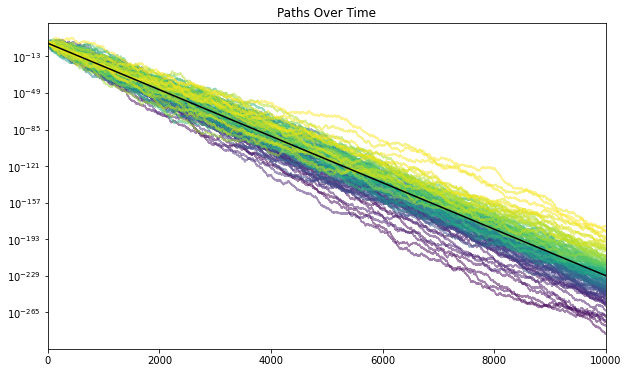

In [6]:
w_paths = pd.DataFrame(w_paths_dict)

w_paths = w_paths.sort_values(by=w_paths.index[-1], axis=1)  # sort the paths
w_paths.plot(logy=True, figsize=(10, 6), cmap='viridis', legend=False, alpha=0.5)
pd.Series(decay_dict).plot(logy=True, color='black', title='Paths Over Time')
plt.show()

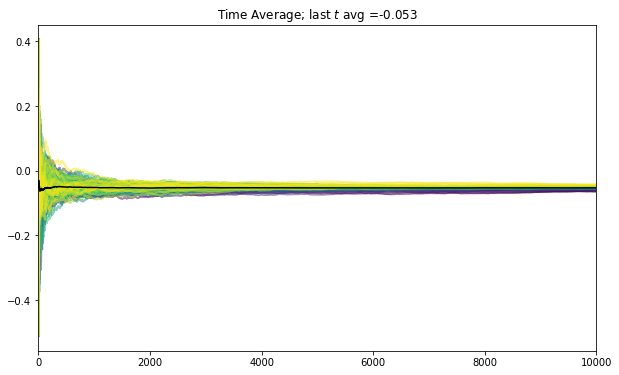

In [7]:
log_growth_avg = (np.log(w_paths) - np.log(w_paths).shift()).expanding().mean()
log_growth_avg_mean = log_growth_avg.mean(axis=1)
last_v = str(round(log_growth_avg_mean.values[-1], 3))

log_growth_avg.plot(legend=False, cmap='viridis', figsize=(10, 6), alpha=0.5)
log_growth_avg.mean(axis=1).plot(legend=False, color='black', title='Time Average; last $t$ avg =' + last_v)
plt.show()

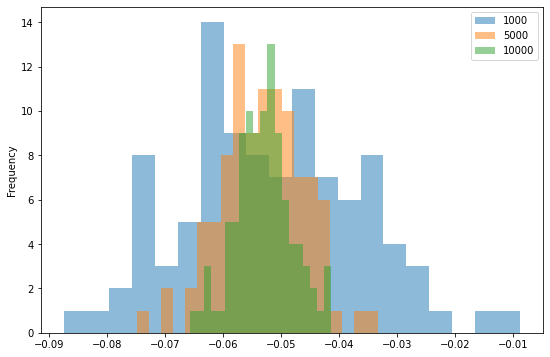

In [22]:
log_growth_avg.iloc[1000, :].plot(kind='hist', alpha=0.5, bins=20, figsize=(9, 6), legend='1000')
log_growth_avg.iloc[5000, :].plot(kind='hist', alpha=0.5, bins=20, legend='5000')
log_growth_avg.iloc[10000, :].plot(kind='hist', alpha=0.5, bins=20, legend='10000')
plt.show()

In [24]:
# todo distrituion of growth (Normal, pag. 24)
# todo heatmap

It can be shown that the time-average growth rate of a single trajectory is the same as that of a finite-ensemble average of trajectories, 

$$\lim_{t \to \infty} \frac{\Delta \ln x}{\Delta t} =  \lim_{t \to \infty} \frac{\Delta \ln \langle x \rangle_N}{\Delta t}$$



----

### <span style='font-family:Georgia'> Multiplicative growth rate

An observable that neatly summarises the two different aspects of multiplicative growth we have illustrated is the **multiplicative (exponential) growth rate**, observed over finite time $t$, in a finite ensemble of $N$ realisations

$$g_m(\langle x(t) \rangle _N , \Delta t) =\frac{\Delta \ln \langle x \rangle_N}{\Delta t}$$

The relevant scalars arise as two different limits of the same stochastic object. Let's define the multiplicative growth rate formula.

In [9]:
def mul_exp_growth_rate(r_pos, r_neg, T, N, do_print=True):
    
    # starting wealth is one

    realizations = pd.DataFrame(np.random.choice([r_pos, r_neg], [T, N]))
    wealth_evolution = realizations.cumprod()
    exp_growth = np.log(wealth_evolution.iloc[-1, :].mean()) / T
    
    if do_print:
        print('Exponential growth with N = %s and t = %s: ' % (str(N), str(T)), round(exp_growth * 100, 2), '%')
    
    return exp_growth

The exponential growth rate of the expectation value (that’s also $\frac{1}{\delta t} ln \langle r \rangle$, ie +4.7%) is

$$g_{\langle \rangle} = \lim_{N \to \infty} g_m$$

In [10]:
mul_exp_growth_high_N = mul_exp_growth_rate(r_pos=1.5, r_neg=0.6, N=10000, T=3)

Exponential growth with N = 10000 and t = 3:  4.86 %


In [390]:
growth_l = []
for i in range(1000):
    growth_l.append(mul_exp_growth_rate(r_pos=1.5, r_neg=0.6, N=1000, T=3, do_print=False))

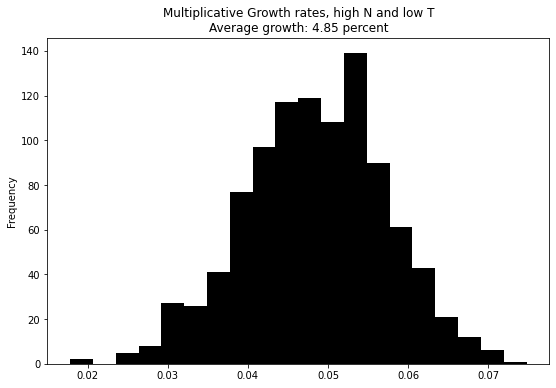

In [391]:
fig_title = 'Multiplicative Growth rates, high N and low T\nAverage growth: %s percent'  % \
round(pd.Series(growth_l).mean() * 100, 2)
pd.Series(growth_l).plot(kind='hist', bins=20, color='black', figsize=(9, 6), title=fig_title)
plt.show()

and the exponential growth rate followed by every trajectory when observed for a long time (that’s also  $\frac{1}{\delta t} \ln \bar{r}$, ie -5.1%)

$$g_{\langle \rangle} = \lim_{t \to \infty} g_m$$

In [367]:
mul_exp_growth_high_N = mul_exp_growth_rate(r_pos=1.5, r_neg=0.6, N=2, T=1000)

Exponential growth with N = 2 and t = 1000:  -4.33 %


In [368]:
growth_l = []
for i in range(1000):
    growth_l.append(mul_exp_growth_rate(r_pos=1.5, r_neg=0.6, N=1, T=1000, do_print=False))

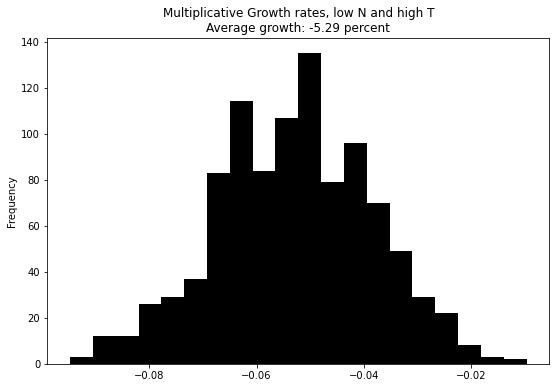

In [389]:
fig_title = 'Multiplicative Growth rates, low N and high T\nAverage growth: %s percent'  % \
round(pd.Series(growth_l).mean() * 100, 2)

pd.Series(growth_l).plot(kind='hist', bins=20, color='black', figsize=(9, 6), title=fig_title)
plt.show()

## <span style='font-family:Georgia'> Ergodic Property

<div class="alert alert-info">
In these notes, an observable $A$ is called ergodic if its expectation value is constant in time and its time average converges to this value with probability one

$${\displaystyle  \lim_{t \to \infty}{\frac {1}{\Delta t}}\int _{0}^{t + \Delta t} A(s)ds = \lim_{N \to \infty}{\frac {1}{N}} \sum_i^N A_i(t)}$$</div>

In this game, what happens to $x$ over time, i.e. the rate of change of wealth $\frac{\delta x (t)}{\delta t}$ is a different random variable for each $t$ because it is proportional to $x(t)$. We want something more stable, and so wqe can find the two **Ergodic Observables**: 

- the multiplicative factor $r(t)$ is **an ergodic observable** that reflects **what happens to the expectation value of $x$**, 
- per-round changes in the logarithm of wealth, $\delta \ln x = \ln r$, are also **ergodic** and reflect **what happens to $x$ over time**.

For multiplicative dynamics, i.e. if $\frac{x( t + \delta t)}{x(t)}$ is stationary, the expectation value of the rate of change of the logarithm of $x(t)$ determines whether the game is long-term profitable for an individual (*ie if the time average of wealth grows or not*).

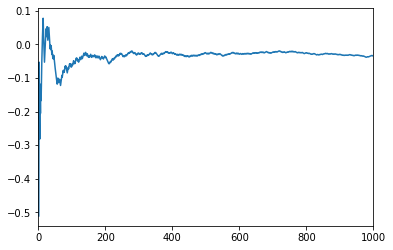

In [8]:
(np.log(pd.Series(w_dict))- np.log(pd.Series(w_dict).shift())).expanding().mean().plot()
plt.show()

In [50]:
(np.log(pd.Series(w_dict))- np.log(pd.Series(w_dict).shift())).expanding().mean()

0             NaN
1        0.405465
2        0.405465
3        0.100035
4        0.176392
           ...   
9996    -0.053505
9997    -0.053459
9998    -0.053413
9999    -0.053368
10000   -0.053413
Length: 10001, dtype: float64

## <span style='font-family:Georgia'> Brownian Motion


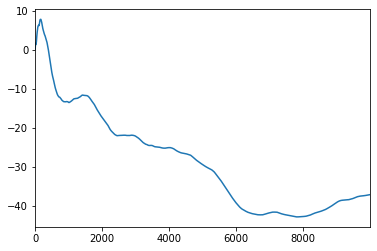

57.735026918962575


In [86]:
t = 10000
realizations = np.random.normal(0, 1, t)
v = pd.Series(realizations).cumsum()
v.expanding().mean().plot()
plt.show()
print(np.sqrt(t/3))

In [137]:
t = 1000
realizations = np.random.normal(0, 1, [t, 100])
v = pd.DataFrame(realizations).cumsum()
print('time avg std: ', v.iloc[-1, :].std(), ', time avg theoretical std: ', np.sqrt(t/3))

time avg std:  34.54956255453124 , time avg theoretical std:  18.257418583505537
